In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings
warnings.filterwarnings('ignore') # no more warnings 
pd.set_option('display.max_columns', None) # displays all columns in dfs

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
dataset = pd.read_csv('startup data.csv')

In [3]:
dataset

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,CA,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,MA,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,CA,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [4]:
dataset.category_code.value_counts()

software            153
web                 144
mobile               79
enterprise           73
advertising          62
games_video          52
semiconductor        35
network_hosting      34
biotech              34
hardware             27
ecommerce            25
public_relations     25
cleantech            23
security             19
analytics            19
social               14
search               12
other                11
messaging            11
fashion               8
travel                8
news                  8
medical               7
photo_video           7
music                 6
finance               6
education             4
consulting            3
real_estate           3
health                3
automotive            2
manufacturing         2
transportation        2
hospitality           1
sports                1
Name: category_code, dtype: int64

In [5]:
dataset.is_top500.value_counts()

1    747
0    176
Name: is_top500, dtype: int64

In [6]:
display(dataset.labels.value_counts())
dataset.status.value_counts()

1    597
0    326
Name: labels, dtype: int64

acquired    597
closed      326
Name: status, dtype: int64

age first funding year is the age of the company in years since it got first funding. similar for age last funding year.

milestonefor any startup is a tracking mark for startups. Just like a milestone on the side of a road marks how far you've gone, a milestone in startups tracks progress as an startup grow and implement their plan.

relationships- it says how many relationship does a startup have. For example a start up can have relationships with accountants, investors, vendors, mentors, etc.

funding rounds for a startup is the number of times they are going to the market to raise capital. Each of these raises is known as a ‘funding round’.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [8]:
dataset.status.value_counts()

acquired    597
closed      326
Name: status, dtype: int64

In [9]:
dataset.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [10]:
drop_columns = ['Unnamed: 0', 'latitude', 'longitude', 'id', 'state_code.1', 'Unnamed: 6', 'name',
                'object_id', 'labels', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software',
                'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
                'is_biotech', 'is_consulting', 'is_othercategory','closed_at', 'age_first_milestone_year', 'age_last_milestone_year']
dataset = dataset.drop(columns=drop_columns) # dropping low impact columns
# '

In [11]:
dataset

,state_code,zip_code,city,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,92101,San Diego,1/1/2007,4/1/2009,1/1/2010,2.2493,3.0027,3,3,375000,3,music,0,1,0,0,0,0,1.0000,0,acquired
1,CA,95032,Los Gatos,1/1/2000,2/14/2005,12/28/2009,5.1260,9.9973,9,4,40100000,1,enterprise,1,0,0,1,1,1,4.7500,1,acquired
2,CA,92121,San Diego,3/18/2009,3/30/2010,3/30/2010,1.0329,1.0329,5,1,2600000,2,web,0,0,1,0,0,0,4.0000,1,acquired
3,CA,95014,Cupertino,1/1/2002,2/17/2005,4/25/2007,3.1315,5.3151,5,3,40000000,1,software,0,0,0,1,1,1,3.3333,1,acquired
4,CA,94105,San Francisco,8/1/2010,8/1/2010,4/1/2012,0.0000,1.6685,2,2,1300000,1,games_video,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,94107,San Francisco,1/1/2009,7/9/2009,7/9/2009,0.5178,0.5178,9,1,1100000,2,advertising,0,0,1,0,0,0,6.0000,1,acquired
919,MA,1803,Burlington,1/1/1998,4/1/2005,3/23/2007,7.2521,9.2274,1,3,52000000,1,security,1,0,0,1,0,0,2.6667,1,closed
920,CA,94089,Sunnyvale,1/1/1999,6/29/2007,6/29/2007,8.4959,8.4959,5,1,44000000,1,biotech,0,0,0,0,0,1,8.0000,1,closed
921,CA,94404,San Francisco,1/1/2009,10/5/2009,11/1/2011,0.7589,2.8329,12,2,15500000,2,software,0,0,1,1,0,0,1.0000,1,acquired


In [12]:
dataset.isna().any()

state_code                False
zip_code                  False
city                      False
founded_at                False
first_funding_at          False
last_funding_at           False
age_first_funding_year    False
age_last_funding_year     False
relationships             False
funding_rounds            False
funding_total_usd         False
milestones                False
category_code             False
has_VC                    False
has_angel                 False
has_roundA                False
has_roundB                False
has_roundC                False
has_roundD                False
avg_participants          False
is_top500                 False
status                    False
dtype: bool

In [13]:
#numerical_variables = dataset[['age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'avg_participants']]
#numerical_variables

<AxesSubplot:xlabel='age_first_funding_year'>

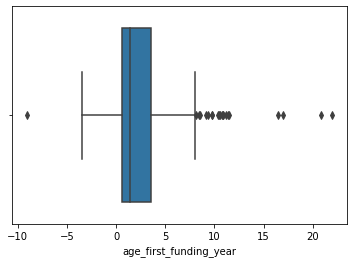

In [14]:
sns.boxplot(x= dataset.age_first_funding_year)

(923, 22)
(899, 22)


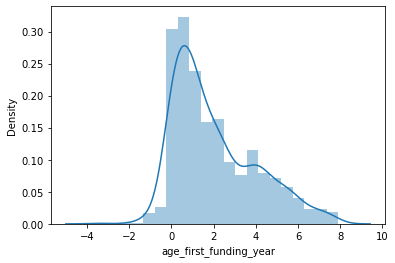

(899, 22)
(885, 22)


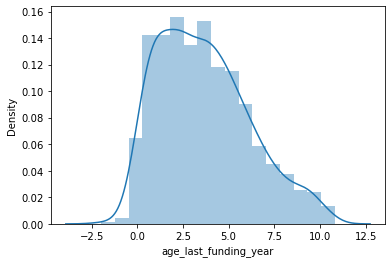

In [15]:
columns_to_drop = ['age_first_funding_year','age_last_funding_year'] # columns with outliers to drop
for drop in columns_to_drop:             # iterate over the columns to drop
    print(dataset.shape)                    # dataframe shape before drops
    
    Q1 = dataset.quantile(0.25) # first quantile
    Q3 = dataset.quantile(0.75) # third quantile
    IQR = Q3 - Q1            # inter quantile range

    dataset = dataset[~(                                 # negation so we get the datapoints within the whiskers
        (dataset[columns_to_drop] < (Q1 - 1.5 * IQR)) # datapoints left of the "left whisker"
        |(dataset[columns_to_drop] > (Q3 + 1.5 * IQR) # datapoints right of the 'right whisker'
        )).any(axis=1)]
    
    print(dataset.shape)                    # data frame shape after drops
    sns.distplot(dataset[drop])
    plt.show()

In [19]:
dataset

,state_code,zip_code,city,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,92101,San Diego,1/1/2007,4/1/2009,1/1/2010,2.2493,3.0027,3,3,375000,3,music,0,1,0,0,0,0,1.0000,0,acquired
1,CA,95032,Los Gatos,1/1/2000,2/14/2005,12/28/2009,5.1260,9.9973,9,4,40100000,1,enterprise,1,0,0,1,1,1,4.7500,1,acquired
2,CA,92121,San Diego,3/18/2009,3/30/2010,3/30/2010,1.0329,1.0329,5,1,2600000,2,web,0,0,1,0,0,0,4.0000,1,acquired
3,CA,95014,Cupertino,1/1/2002,2/17/2005,4/25/2007,3.1315,5.3151,5,3,40000000,1,software,0,0,0,1,1,1,3.3333,1,acquired
4,CA,94105,San Francisco,8/1/2010,8/1/2010,4/1/2012,0.0000,1.6685,2,2,1300000,1,games_video,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,WA,98021,Bothell,1/1/2000,8/17/2005,10/2/2008,5.6301,8.7589,9,5,122500000,2,mobile,1,0,0,0,1,1,5.6000,1,acquired
918,CA,94107,San Francisco,1/1/2009,7/9/2009,7/9/2009,0.5178,0.5178,9,1,1100000,2,advertising,0,0,1,0,0,0,6.0000,1,acquired
919,MA,1803,Burlington,1/1/1998,4/1/2005,3/23/2007,7.2521,9.2274,1,3,52000000,1,security,1,0,0,1,0,0,2.6667,1,closed
921,CA,94404,San Francisco,1/1/2009,10/5/2009,11/1/2011,0.7589,2.8329,12,2,15500000,2,software,0,0,1,1,0,0,1.0000,1,acquired


In [34]:
dataset = dataset[~(dataset['age_first_funding_year'] < 0)]
dataset

,state_code,zip_code,city,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,92101,San Diego,1/1/2007,4/1/2009,1/1/2010,2.2493,3.0027,3,3,375000,3,music,0,1,0,0,0,0,1.0000,0,acquired
1,CA,95032,Los Gatos,1/1/2000,2/14/2005,12/28/2009,5.1260,9.9973,9,4,40100000,1,enterprise,1,0,0,1,1,1,4.7500,1,acquired
2,CA,92121,San Diego,3/18/2009,3/30/2010,3/30/2010,1.0329,1.0329,5,1,2600000,2,web,0,0,1,0,0,0,4.0000,1,acquired
3,CA,95014,Cupertino,1/1/2002,2/17/2005,4/25/2007,3.1315,5.3151,5,3,40000000,1,software,0,0,0,1,1,1,3.3333,1,acquired
4,CA,94105,San Francisco,8/1/2010,8/1/2010,4/1/2012,0.0000,1.6685,2,2,1300000,1,games_video,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,WA,98021,Bothell,1/1/2000,8/17/2005,10/2/2008,5.6301,8.7589,9,5,122500000,2,mobile,1,0,0,0,1,1,5.6000,1,acquired
918,CA,94107,San Francisco,1/1/2009,7/9/2009,7/9/2009,0.5178,0.5178,9,1,1100000,2,advertising,0,0,1,0,0,0,6.0000,1,acquired
919,MA,1803,Burlington,1/1/1998,4/1/2005,3/23/2007,7.2521,9.2274,1,3,52000000,1,security,1,0,0,1,0,0,2.6667,1,closed
921,CA,94404,San Francisco,1/1/2009,10/5/2009,11/1/2011,0.7589,2.8329,12,2,15500000,2,software,0,0,1,1,0,0,1.0000,1,acquired


In [35]:
dataset.describe()

,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,840.000000,840.000000,840.000000,840.000000,8.400000e+02,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,2.077830,3.762109,7.751190,2.310714,2.607170e+07,1.861905,0.322619,0.246429,0.525000,0.401190,0.241667,0.098810,2.847240,0.821429
std,1.820887,2.470589,7.230992,1.380912,1.984788e+08,1.314620,0.467757,0.431188,0.499672,0.490431,0.428348,0.298584,1.880898,0.383221
min,0.000000,0.000000,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.667825,1.813675,3.000000,1.000000,3.000000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,1.487700,3.498600,5.500000,2.000000,1.000000e+07,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,3.332875,5.321225,10.000000,3.000000,2.500000e+07,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,7.254800,10.819200,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [36]:
for item in numerical.columns: # iterate over all numerical columns and show the boxplot for each
    print(item)
    sns.boxplot(x = numerical[item])
    plt.show()

NameError: name 'numerical' is not defined

In [37]:
import seaborn as sns

for feature in numerical_variables:
    sns.distplot(dataset[feature])
    plt.show()

NameError: name 'numerical_variables' is not defined

In [ ]:
numerical_variables_status = numerical_variables.join(dataset.status)
numerical_variables_status